In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

C:\Users\Dell\Anaconda\envs\tf\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Dell\Anaconda\envs\tf\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Dell\Anaconda\envs\tf\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Dell\Anaconda\envs\tf\lib\site-packages\tensorflow\python\framework\dtypes.py:5

In [2]:
# example of inference with a pre-trained coco model
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from mrcnn.config import Config
from mrcnn.model import MaskRCNN
from matplotlib import pyplot
from matplotlib.patches import Rectangle

ModuleNotFoundError: No module named 'mrcnn'

In [3]:
# define the test configuration
class TestConfig(Config):
     NAME = "test"
     GPU_COUNT = 1
     IMAGES_PER_GPU = 1
     NUM_CLASSES = 1 + 80

NameError: name 'Config' is not defined

In [4]:
# define the model
rcnn = MaskRCNN(mode='inference', model_dir='./', config=TestConfig())

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [5]:
# load coco model weights
rcnn.load_weights('mask_rcnn_coco.h5', by_name=True)

In [6]:
img = load_img('1618728765_einstein.jpg')
img = img_to_array(img)

In [7]:
# make prediction
results = rcnn.detect([img], verbose=0)

In [8]:
boxes = results[0]['rois']

In [9]:
y1, x1, y2, x2 = boxes[0]

In [10]:
# draw an image with detected objects
def draw_image_with_boxes(filename, boxes_list):
     # load the image
     data = pyplot.imread(filename)
     # plot the image
     pyplot.imshow(data)
     # get the context for drawing boxes
     ax = pyplot.gca()
     # plot each box
     for box in boxes_list:
          # get coordinates
          y1, x1, y2, x2 = box
          # calculate width and height of the box
          width, height = x2 - x1, y2 - y1
          # create the shape
          rect = Rectangle((x1, y1), width, height, fill=False, color='red')
          # draw the box
          ax.add_patch(rect)
     # show the plot
     pyplot.show()

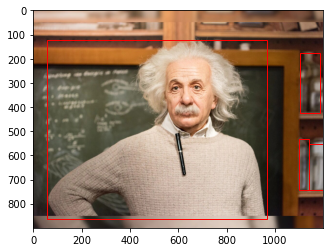

In [11]:
# visualize the results
draw_image_with_boxes('1618728765_einstein.jpg', results[0]['rois'])

In [12]:
# define 81 classes that the coco model knowns about
class_names = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
               'bus', 'train', 'truck', 'boat', 'traffic light',
               'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
               'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
               'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
               'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
               'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
               'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
               'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
               'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
               'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
               'teddy bear', 'hair drier', 'toothbrush']

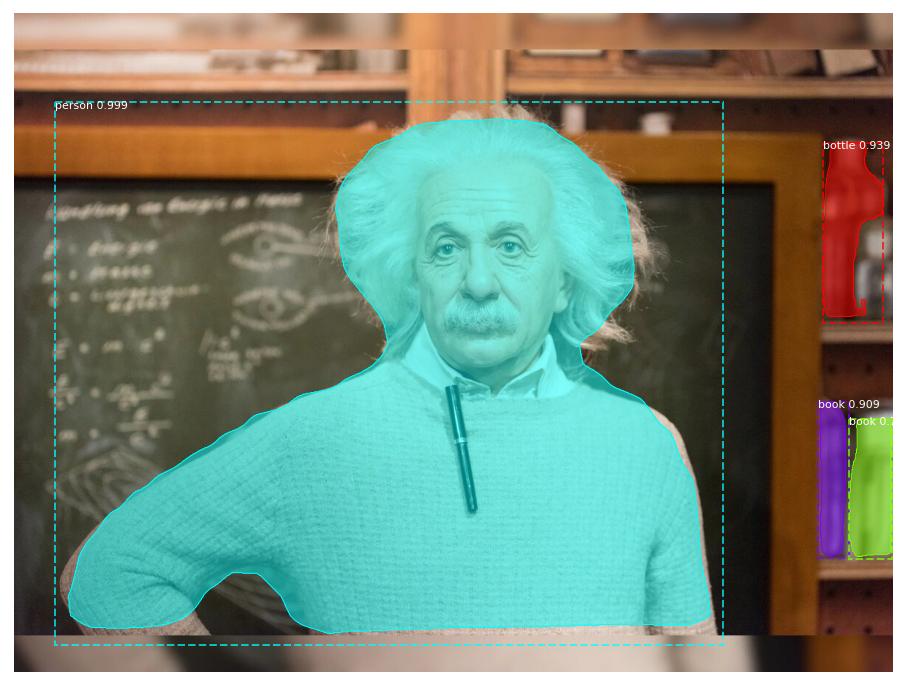

In [13]:
from mrcnn.visualize import display_instances
# get dictionary for first prediction
r = results[0]
# show photo with bounding boxes, masks, class labels and scores
display_instances(img, r['rois'], r['masks'], r['class_ids'], class_names, r['scores'])

In [14]:
mask = r['masks']
mask = mask.astype(int)
mask.shape

(900, 1200, 4)

In [15]:
r['masks'][3].shape

(1200, 4)

In [16]:
idx = np.where(r['class_ids'] == 1)[0][0]

In [19]:
from skimage.io import imread
from skimage.transform import resize
import skimage
import matplotlib.pyplot as plt

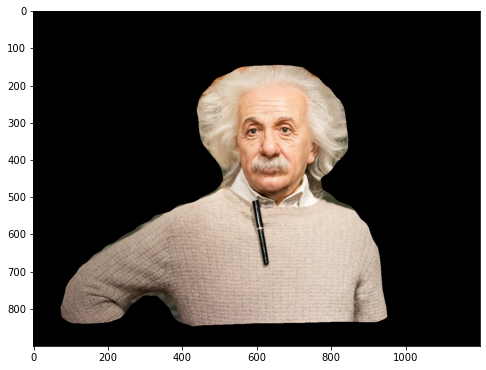

In [20]:
temp = skimage.io.imread('1618728765_einstein.jpg')
for j in range(temp.shape[2]):
    temp[:,:,j] = temp[:,:,j] * mask[:,:,idx]
plt.figure(figsize=(8,8))
plt.imshow(temp)